# Keplerian Orbit

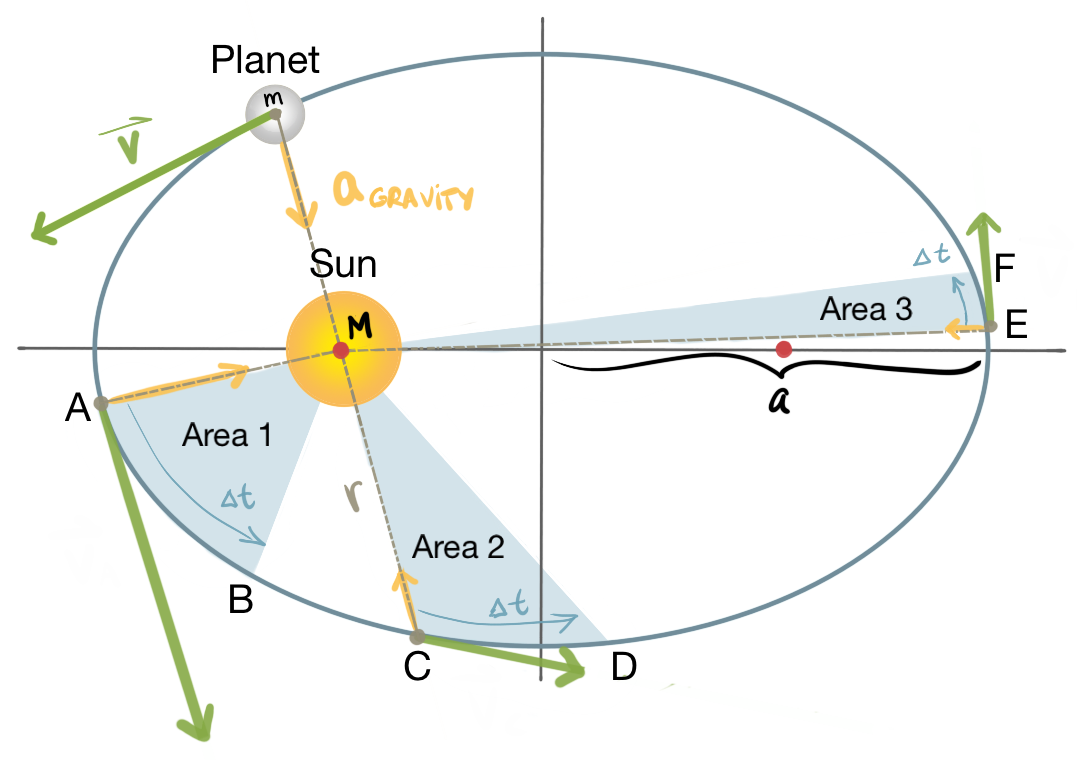

Caption. A planet with mass m and velocity v undergoes a Keplerian orbit about a star (sun) with mass M. This particular orbit is elliptical and has a semi-major axis of a. The planet will have a faster orbital speed when it is closer to the star (smaller radius r), such as at point A compared to point E. In a Keplerian orbit, the orbiting body stably orbits the central body since its perpendicular motion to the star is balanced by the central body's inward gravitational pull a$_{gravity}$. Credit: G. O. Hollyday.

An orbit balanced only by gravity is known as a <i>Keplerian</i> orbit. The following equation describes the motion of a body in orbit around a central body where gravity is the only force involved. This equation will hold true for any stably orbiting mass subject only to first-order gravitational forces. The angular velocity $\omega$ for a Keplerian orbit is dependent on the mass of the central body M (the body being orbited, e.g., the corotating region of a synestia) and how much distance, r, there is between the center of the orbiting body and the center of the orbited body.

$$\omega^2 r - \frac{GM}{r^2} = 0$$

The gravitational force of the central body on an orbiting body is much greater when the orbital radius r of the orbiting body is smaller. To avoid impacting the central body at smaller orbital radii, and conserve the orbiting body's angular velocity, the orbiting body's linear velocity must increase so that the distance the orbiting body travels inwards as it is pulled towards the central body is minimal. In fact, an orbiting body is always moving towards the central body, but because of its perpendicular linear motion, it maintains a given distance away from the central body.

A given body in a Keplerian orbit will travel at an angular velocity $\omega = v / r$ that determines how quickly the body will sweep through its orbit (how wide of an angle in a given amount of time). This sweep can be thought of as an area of the orbit (e.g., Area 1 in the image above). For a given length of time dt, the orbiting body will always sweep through the same amount of area. If the orbiting body is close to the orbited body (small r, ex. at point A in the image above), then during the time interval dt, the orbiting body will sweep through a wide angle with a high angular velocity. Conversely, if the orbiting body is far from the orbited body (large r, ex. point E in the image above), then during the same time interval, the orbiting body will sweep through a small angle at a low angular velocity. This is known as Kepler's second law of planetary motion.

A Keplerian orbit will follow Kepler's three laws of planetary motion:
1. The trajectory of an orbiting body about a central body is elliptical with the central body located at one focus of the ellipse.
2. The orbital radius r and angular velocity d$\theta$/dt of an orbiting body will not be constant throughout an elliptical orbit, but the area A (that the imaginary line between the orbiting body and the central body sweeps through) is constant. As an equation, Kepler's second law is:
    $$\frac{dA}{dt}=\frac{r^2}{2}\frac{d\theta}{dt}$$
3. The orbital period T of an orbiting body with mass m is directly proportional to the 3/2 power of the orbit's semi-major axis a. As an equation, Kepler's third law is:
    $$T=2\pi\sqrt{\frac{a^3}{G(M+m)}}$$
    where G is the gravitational constant and M is the mass of the central body. Note that the ratio T$^2$/a$^3$ is constant. In other words, a single orbit takes longer to complete if the average distance from the orbiting body to the central body is larger.

A <i>circular</i> orbit is a Keplerian orbit with zero eccentricity. This means the path traced by the orbiting body is a circle. If the eccentricity of a Keplerian orbit is greater than zero but less than one, the orbital path becomes an ellipse.

The semi-major axis of an orbit is half the distance between the farthest parts of the orbit (a in the image above). The inclination of an orbit is how rotated the orbital plane is in comparison to the midplane (z = 0).

Below is an interactive plot of what a Keplerian orbit should look like for a moonlet (dot) orbiting an Earth-mass body (star). Feel free to play with the semi-major axis (half the distance between the farthest parts of the orbit, a in the image above), inclination (how rotated the orbital plane with comparison to the midplane), and eccentricity of the moonlet's orbit and see how it affects the moonlet's trajectory. Inclination is in radians, where 0$^\circ$ is 0 radians and 180$^\circ$ is $\pi$ radians. To convert from radians to degrees, multiply the number in radians by 180/$\pi$.

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
import numpy as np
import math
from ipywidgets import *
import rebound
from syndef import synfits #import synestia snapshot (impact database)

G=6.674e-11 #gravitational constant in SI
Mass_syn=np.sum(synfits.SNAP_CukStewart.m) #Earth mass synestia in kg
dens=3300. #kg/m^3 lunar density

def pltKep(rad_moon,sma,i,ecc):
    #rad_moon is the bodily radius of the moon
    #i is the inclination of the moon's orbital plane
    #sma is the semi-major axis of the moon's orbit
    #ecc is the eccentricity of the moon's orbit
    m_moon = 4.*math.pi*dens*(rad_moon**3)/3.
    sim = rebound.Simulation() #start simulation
    sim.units = ('Hr', 'M', 'Kg') #use SI units
    sim.add(m=Mass_syn) #add central body
    sim.add(m=m_moon,a=sma,inc=i,e=ecc)
    fig,ax_main,ax_sub1,ax_sub2 = rebound.OrbitPlot(sim,slices=1,xlim=[-120000000,60000000],ylim=[-60000000,60000000],unitlabel='(m)',color=True)

style = {'description_width': 'initial'}
layout = {'width': '400px'}
interact(pltKep,
         rad_moon=FloatSlider(value=1, min=1, max=100, step=10, description='Body radius of moonlet (m)',
                            continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         sma=FloatSlider(value=20e6, min=10e6, max=60e6, step=10e6, description='Semi-major axis (m)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         i=FloatSlider(value=0, max=2.*math.pi, step=0.2, description='Inclination of orbit (radians)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         ecc=FloatSlider(value=0, max=0.9, step=0.1, description='Eccentricity of orbit (unitless)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         )

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Body radius of moonlet (m)'…

<function __main__.pltKep(rad_moon, sma, i, ecc)>

<i>Caption</i>. In the interactive above, a moonlet (dot) orbits an Earth-mass body (star) on a Keplerian orbit. Keplerian orbits are stable orbits balanced by gravity only. They can be circular (eccentricity = 0) or ellipsoidal (0 $<$ eccentricity $<$ 1) in nature.

The more inclined the orbit, the farther the orbiting body will travel off the midplane. The more eccentric the orbit, the more elliptical the orbit becomes. Increasing the semi-major axis will increase the maximum distance the orbiting body travels away from the central body. There are a variety of orbits that satisfy a Keplerian orbit. As long as the orbiting body's mass is not on the same order of magnitude as the central body, the mass (thus size) of the orbiting body does not affect the orbit. Changing the mass of the central body would affect the angular velocity of the orbiting body but not the path of the orbit.